In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[24]:


import networkx as nx
import community
from community import community_louvain
import numpy as np
import copy  
import matplotlib.pyplot as plt
import collections
import graph_ase_BNU
from sklearn.utils.extmath import randomized_svd
import collections
import lcc_BNU
from scipy.stats import binom_test

# In[17]:


def ase_graph(G): 
    sorted_vertex = sorted(G.nodes())
    A = nx.to_scipy_sparse_matrix(G, nodelist=sorted_vertex)
    n = G.number_of_nodes()
    max_dim = max_dim_ase
    
    svd_seed = 1234
    U, Sigma, VT = randomized_svd(A, 
                              n_components=min(max_dim, n - 1),
                              n_iter=50,
                              random_state=svd_seed)

    ##print ("dimension reduction (elbow selection)")
    #rank_graph =  getElbows_BNU.getElbows(Sigma, n_elbows=elb)
    
    #reduced_dim = rank_graph[(elb-1)]
    ##print ("elbow is %d" %reduced_dim)

    reduced_dim = 2 
    s_sqrt = np.sqrt(Sigma) 

    
    s_sqrt_dim_reduced = s_sqrt[:reduced_dim]
    U_dim_reduced = U[:, :reduced_dim ]
    VT_dim_reduced =VT[:reduced_dim, :]

    Xhat = np.multiply( s_sqrt_dim_reduced, U_dim_reduced)
    
    embedded_dict = {}
    for _, vertex in enumerate(sorted_vertex):
        embedded_dict[vertex] = Xhat[_, :]
     
    
    embedded = collections.namedtuple('embedded', 'Xhat vertex_labels dict')
    result = embedded(Xhat = Xhat, vertex_labels = sorted_vertex, dict = embedded_dict)
    
    return result

def sqdist(vector):
    return sum(x*x for x in vector)

def degtrim_max(G, max_threshold):
    tmpG = copy.deepcopy(G)

    for vertex in G.nodes():
        if G.degree[vertex] >= max_threshold:
            tmpG.remove_node(vertex)

    Graph = copy.deepcopy(tmpG)
    louvain = community.best_partition(Graph, resolution=1, randomize=False)
    mod = community.modularity(louvain, Graph)

    embedded = collections.namedtuple('embedded', 'G mod')
    result = embedded(G = Graph, mod = mod)

    return result

def degtrim_minmax(G, percent_threshold):

    tmpG = copy.deepcopy(G)
    sorted_degrees_desc = sorted(G.degree, key=lambda x: x[1], reverse=True)
    sorted_degrees_asc = sorted(G.degree, key=lambda x: x[1], reverse=False)
    count_threshold = int(percent_threshold * G.number_of_nodes())
    ctr = 0 
    if ctr <= count_threshold:
        high_trim = sorted_degrees_desc[ctr][0]
        low_trim = sorted_degrees_asc[ctr][0]
        tmpG.remove_node(high_trim)
        tmpG.remove_node(low_trim)
        ctr += 1
        

    Graph = copy.deepcopy(tmpG)
    louvain = community.best_partition(Graph, resolution=1, randomize=False)
    mod = community.modularity(louvain, Graph)

    embedded = collections.namedtuple('embedded', 'G mod')
    result = embedded(G = Graph, mod = mod)

    return result

#procrustes
def procrustes(A, B):
    tmp = A.T @ B
    U_tmp, Sigma_tmp, VT_tmp = np.linalg.svd(tmp)
    W = U_tmp @ VT_tmp
    return W
    #A@W - B
    
    
def degtrim_max(G, max_threshold):
    tmpG = copy.deepcopy(G)

    for vertex in G.nodes():
        if G.degree[vertex] >= max_threshold:
            tmpG.remove_node(vertex)

    Graph = copy.deepcopy(tmpG)
    louvain = community.best_partition(Graph, resolution=1, randomize=False)
    mod = community.modularity(louvain, Graph)

    embedded = collections.namedtuple('embedded', 'G mod')
    result = embedded(G = Graph, mod = mod)

    return result

def degtrim_minmax(G, percent_threshold):

    tmpG = copy.deepcopy(G)
    sorted_degrees_desc = sorted(G.degree, key=lambda x: x[1], reverse=True)
    sorted_degrees_asc = sorted(G.degree, key=lambda x: x[1], reverse=False)
    count_threshold = int(percent_threshold * G.number_of_nodes())
    ctr = 0 
    if ctr <= count_threshold:
        high_trim = sorted_degrees_desc[ctr][0]
        low_trim = sorted_degrees_asc[ctr][0]
        tmpG.remove_node(high_trim)
        tmpG.remove_node(low_trim)
        ctr += 1
        

    Graph = copy.deepcopy(tmpG)
    louvain = community.best_partition(Graph, resolution=1, randomize=False)
    mod = community.modularity(louvain, Graph)

    embedded = collections.namedtuple('embedded', 'G mod')
    result = embedded(G = Graph, mod = mod)

    return result


def degtrim_minpercent(G, percent_threshold):

    tmpG = copy.deepcopy(G)
    sorted_degrees_asc = sorted(G.degree, key=lambda x: x[1], reverse=False)
    count_threshold = int(percent_threshold * G.number_of_nodes())
    ctr = 0 
    if ctr <= count_threshold:
        low_trim = sorted_degrees_asc[ctr][0]
        tmpG.remove_node(low_trim)
        ctr += 1
        

    Graph = copy.deepcopy(tmpG)
    louvain = community.best_partition(Graph, resolution=1, randomize=False)
    mod = community.modularity(louvain, Graph)

    embedded = collections.namedtuple('embedded', 'G mod')
    result = embedded(G = Graph, mod = mod)

    return result


def degtrim_maxpercent(G, percent_threshold):

    tmpG = copy.deepcopy(G)
    sorted_degrees_desc = sorted(G.degree, key=lambda x: x[1], reverse=True)
    count_threshold = int(percent_threshold * G.number_of_nodes())
    ctr = 0 
    if ctr <= count_threshold:
        high_trim = sorted_degrees_desc[ctr][0]
        tmpG.remove_node(high_trim)
        ctr += 1
        

    Graph = copy.deepcopy(tmpG)
    louvain = community.best_partition(Graph, resolution=1, randomize=False)
    mod = community.modularity(louvain, Graph)

    embedded = collections.namedtuple('embedded', 'G mod')
    result = embedded(G = Graph, mod = mod)

    return result

In [2]:
file_G0 = r'/Users/z/Desktop/execs_email_t108.txt'
file_G1 = r'/Users/z/Desktop/execs_email_t107.txt'


G0 = nx.read_weighted_edgelist(file_G0, comments='#', delimiter=' ', create_using=None, nodetype=str,  encoding='utf-8')
G1 = nx.read_weighted_edgelist(file_G1, comments='#', delimiter=' ', create_using=None, nodetype=str,  encoding='utf-8')




print(G0.size())
print(G0.number_of_nodes())
print(G1.size())
print(G1.number_of_nodes())




136
88
112
89


In [3]:
intersecting_G0_noise =   set(G0.nodes()).intersection(set(G1.nodes()))

remove_from_G0 = set(G0.nodes())-set(G1.nodes())
G0_shared_G1 = copy.deepcopy(G0)
for vertex in list(remove_from_G0):
    G0_shared_G1.remove_node(vertex)

print(G0.number_of_nodes())
print(G0_shared_G1.number_of_nodes())
    

remove_from_G1 = set(G1.nodes())-set(G0.nodes())
G1_shared_G0 = copy.deepcopy(G1)
for vertex in list(remove_from_G1):
    G1_shared_G0.remove_node(vertex)


print(G1.number_of_nodes())
print(G1_shared_G0.number_of_nodes())

88
69
89
69


In [7]:
max_dim_ase = 2

ase_G0 = ase_graph(G0)
ase_G1 = ase_graph(G1)

intersecting_G0_G1 =   set(G0.nodes()).intersection(set(G1.nodes()))

print(len(intersecting_G0_G1 ))


69


In [9]:
intersecting_index = []
for v in intersecting_G0_G1 :
    intersecting_index.append(ase_G0.vertex_labels.index(v))
XhatG0_shared = ase_G0.Xhat[intersecting_index]

intersecting_index = []
for v in intersecting_G0_G1 :
    intersecting_index.append(ase_G1.vertex_labels.index(v))
XhatG1_shared = ase_G1.Xhat[intersecting_index]



In [10]:
#procrustes
W_G1_G0 = procrustes(XhatG1_shared, XhatG0_shared)
XhatG1_shared_proj = XhatG1_shared@W_G1_G0 

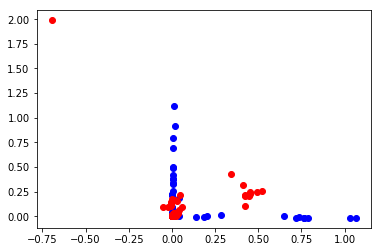

In [12]:
Xhat_G0_G1 = XhatG0_shared - XhatG1_shared_proj 
diff_G0_G1 = np.linalg.norm(Xhat_G0_G1, axis=1)
Xhat_G0_G1 = XhatG0_shared - XhatG1_shared_proj 


plt.plot(XhatG0_shared[:,0], XhatG0_shared[:,1], 'bo')
plt.plot(XhatG1_shared_proj [:,0], XhatG1_shared_proj [:,1], 'ro')


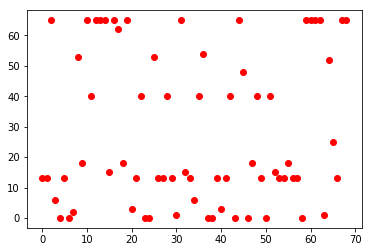

In [15]:



# In[46]:


rank_noise = []

idx = 1 

for idx in range(XhatG0_shared.shape[0]):
    distance_to_noisy = XhatG1_shared_proj - XhatG0_shared[idx,]
    diff_G1_G0v = np.linalg.norm(distance_to_noisy, axis=1)
    rank_noise.append(diff_G1_G0v.argsort()[0])


#delta_rank = np.array(rank_noise) - np.array(rank_trim)





plt.plot(np.array(rank_noise), 'ro')
#plt.plot(np.array(rank_trim), 'go')


0.7751628943758571
0.7602014462809916


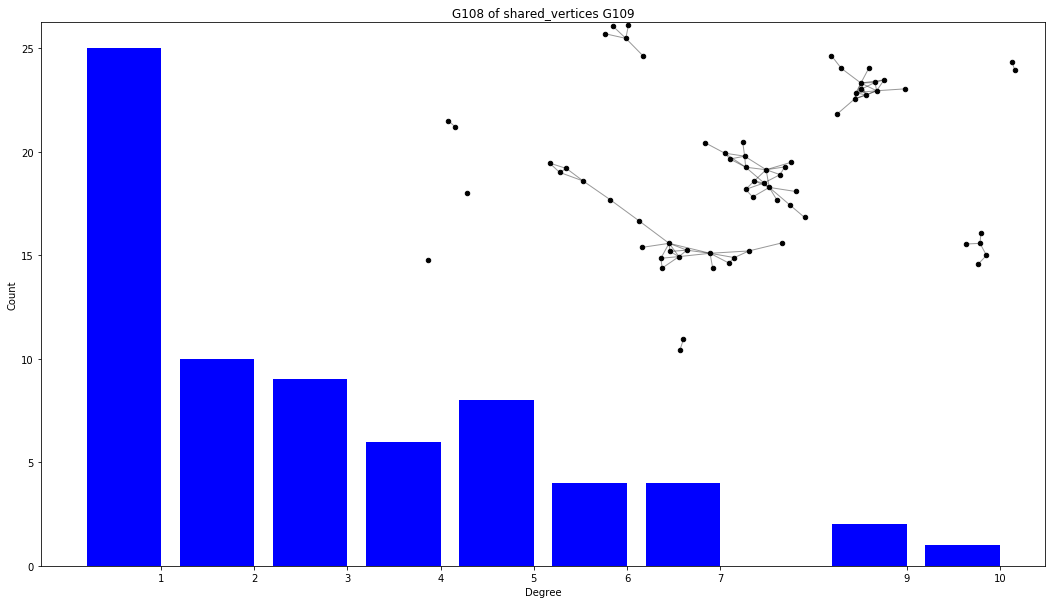

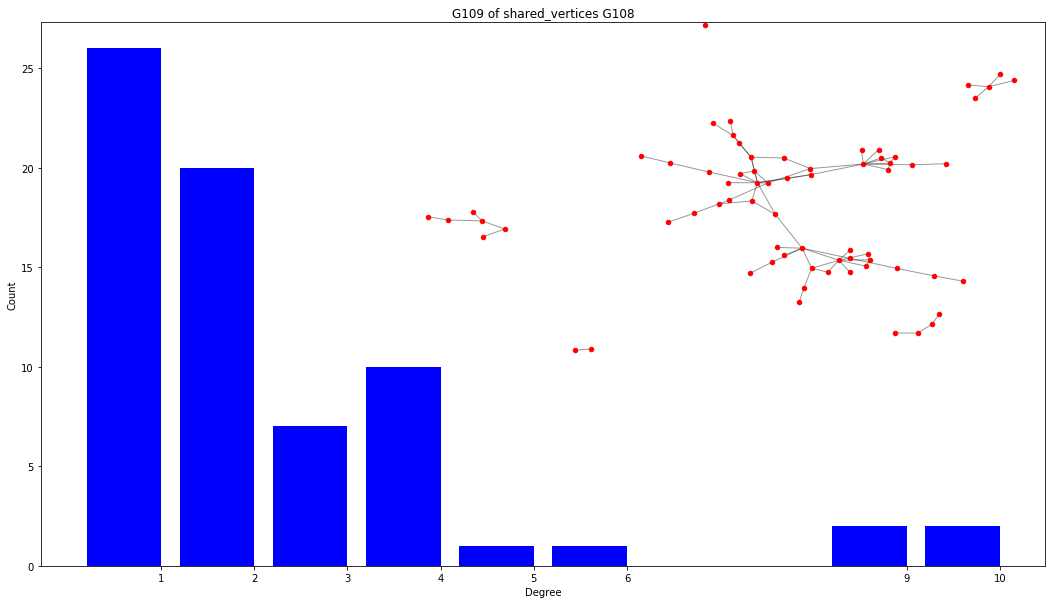

In [20]:

G0 = G0_shared_G1
G1 = G1_shared_G0

Graph = copy.deepcopy(G0)
louvain_G0 = community.best_partition(Graph, resolution=1, randomize=False)
mod_G0 = community.modularity(louvain_G0, Graph)
print(mod_G0)

Graph = copy.deepcopy(G1)
louvain_G1 = community.best_partition(Graph, resolution=1, randomize=False)
mod_G1 = community.modularity(louvain_G1, Graph)
print(mod_G1)



G = G0
tot_degree_sequence_G0 = [d for n, d in G.degree()]  # degree sequence

G = G1
tot_degree_sequence_G1 = [d for n, d in G.degree()]  # degree sequence





G = G0

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(18,10))
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("G108 of shared_vertices G109")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20, node_color='black')
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()



G = G1

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(18,10))
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("G109 of shared_vertices G108")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

[0.7604703395428722, 0.75743645213629, 0.7540484429065745, 0.7507086167800453, 0.7468427928581797, 0.7425639500297443, 0.7411979881115683, 0.73953125, 0.7377022912994714]
[0.7434693877551019]


[Text(0, 0, '9'),
 Text(0, 0, '7'),
 Text(0, 0, '6'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '0')]

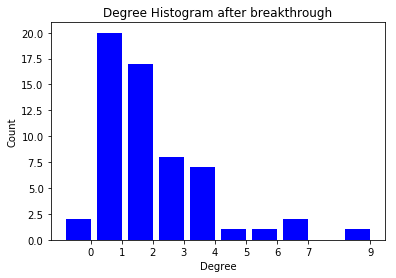

In [8]:

# graphs_modularity4 = []

# #percent_threshold = [0.01, 0.02, 0.05, 0.08, 0.1, 0.13, 0.16, 0.2, 0.25, 0.3, 0.35, 0.4] #this was for G0

# percent_threshold = [0.01, 0.02, 0.05, 0.08, 0.1, 0.13, 0.16, 0.2, 0.3] #, 0.17, 0.2, 0.25, 0.3] #, 0.35]#, 0.4] 
                     
# G_trimmed_new = G1
# for percent in percent_threshold :
#     Gtrim_mod = degtrim_minpercent(G_trimmed_new, percent)
#     G_trimmed_new = Gtrim_mod.G
#     graphs_modularity4.append(Gtrim_mod.mod) 
# G1_Trimmed_min = G_trimmed_new

# print (graphs_modularity4)

# graphs_modularity5 = []
# percent_threshold2 = [0.01]

# G_trimmed_new = G1_Trimmed_min
# for percent in percent_threshold2 :
#     Gtrim_mod = degtrim_maxpercent(G_trimmed_new, percent)
#     G_trimmed_new = Gtrim_mod.G
#     graphs_modularity5.append(Gtrim_mod.mod) 
# G1_Trimmed = G_trimmed_new

# print (graphs_modularity5)


# degree_sequence = sorted([d for n, d in G1_Trimmed.degree()], reverse=True)  # degree sequence
# # print "Degree sequence", degree_sequence
# degreeCount = collections.Counter(degree_sequence)
# deg, cnt = zip(*degreeCount.items())

# fig, ax = plt.subplots()
# plt.bar(deg, cnt, width=0.80, color='b')

# plt.title("Degree Histogram after breakthrough")
# plt.ylabel("Count")
# plt.xlabel("Degree")
# ax.set_xticks([d + 0.4 for d in deg])
# ax.set_xticklabels(deg)

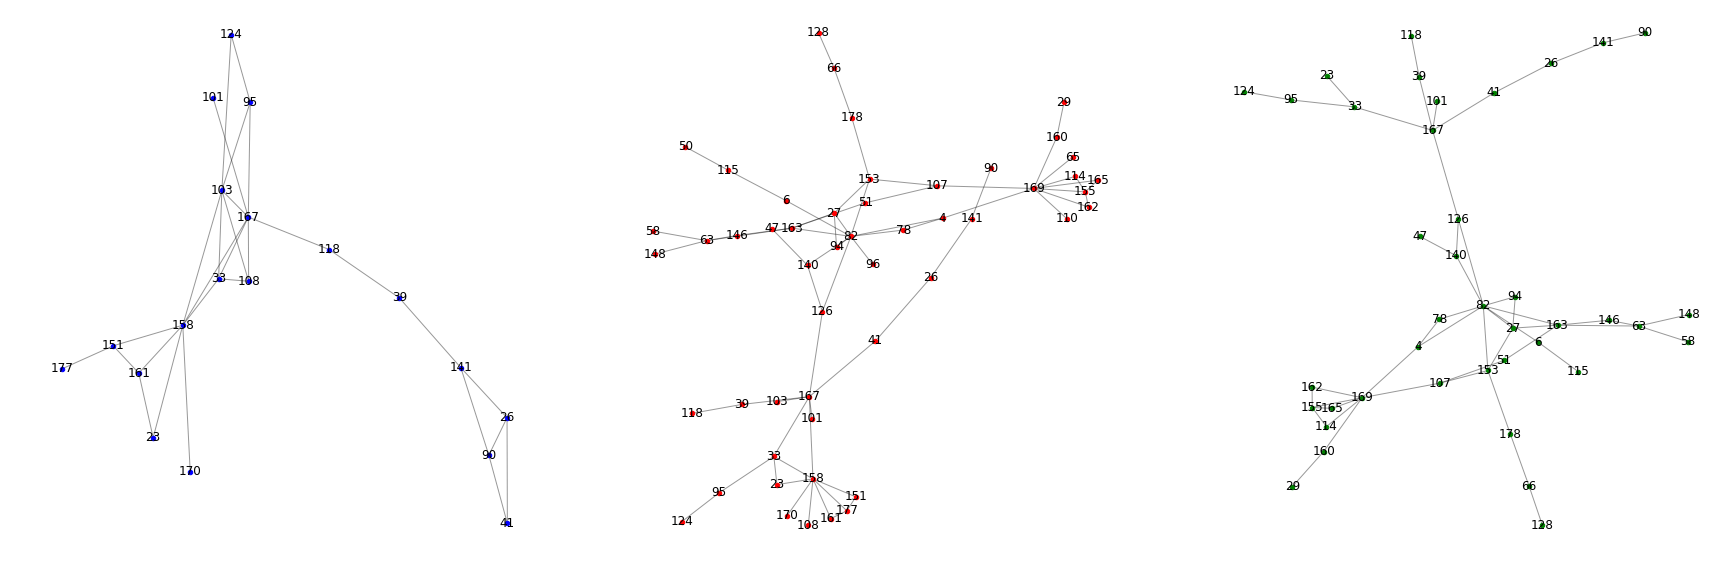

In [10]:

# fig, ax = plt.subplots(figsize=(30,10))

# plt.title("Gnoise_lcc")

# plt.subplot(1, 3, 1)
# G0_lcc = lcc_BNU.extract_lcc(G0)
# pos = nx.spring_layout(G0_lcc)
# plt.axis('off')
# nx.draw_networkx_nodes(G0_lcc, pos, node_size=20, node_color='blue')
# nx.draw_networkx_edges(G0_lcc, pos, alpha=0.4)
# nx.draw_networkx_labels(G0_lcc, pos)

# plt.subplot(1, 3, 2)
# G1_lcc = lcc_BNU.extract_lcc(G1)

# pos = nx.spring_layout(G1_lcc)
# plt.axis('off')
# nx.draw_networkx_nodes(G1_lcc, pos, node_size=20, node_color='red')
# nx.draw_networkx_edges(G1_lcc, pos, alpha=0.4)
# nx.draw_networkx_labels(G1_lcc, pos)

# plt.subplot(1, 3, 3)

# G1_Trimmed_lcc = lcc_BNU.extract_lcc(G1_Trimmed)
# pos = nx.spring_layout(G1_Trimmed_lcc)
# plt.axis('off')
# nx.draw_networkx_nodes(G1_Trimmed_lcc, pos, node_size=20, node_color = 'green',  with_labels = True)
# nx.draw_networkx_edges(G1_Trimmed_lcc, pos, alpha=0.4)
# nx.draw_networkx_labels(G1_Trimmed_lcc, pos)

# plt.show()

In [11]:
max_dim_ase = 2

ase_G0 = ase_graph(G0)
ase_G1 = ase_graph(G1)
ase_G1_Trimmed = ase_graph(G1_Trimmed)





print(set(G1.nodes()) - set(G1_Trimmed.nodes()))
#note here trimming only trimmed nodes that were common in both G0 and G1
#remember to do procrustes!!!!! 

intersecting_G0_noise =   set(G0.nodes()).intersection(set(G1.nodes()))
intersecting_all3 =   list(set(intersecting_G0_noise).intersection(set(G1_Trimmed.nodes())))

print(len(intersecting_G0_noise))
print(len(intersecting_all3))

{'96', '110', '103', '30', '50', '13', '65', '79', '142', '158'}
69
59


In [12]:
intersecting_index = []
for v in intersecting_all3:
    intersecting_index.append(ase_G0.vertex_labels.index(v))
XhatG0_shared = ase_G0.Xhat[intersecting_index]

intersecting_index = []
for v in intersecting_all3:
    intersecting_index.append(ase_G1.vertex_labels.index(v))
XhatG1_shared = ase_G1.Xhat[intersecting_index]

intersecting_index = []
for v in intersecting_all3:
    intersecting_index.append(ase_G1_Trimmed.vertex_labels.index(v))
XhatG1_Trimmed_shared = ase_G1_Trimmed.Xhat[intersecting_index]

In [13]:
#procrustes
W_G1_G0 = procrustes(XhatG1_shared, XhatG0_shared)
XhatG1_shared_proj = XhatG1_shared@W_G1_G0 


W_G1_Trimmed_G0 = procrustes(XhatG1_Trimmed_shared, XhatG0_shared)
XhatG1_Trimmed_shared_proj = XhatG1_Trimmed_shared@W_G1_Trimmed_G0 


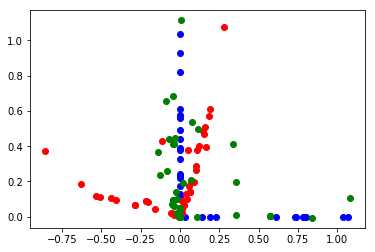

In [14]:
Xhat_G0_G1 = XhatG0_shared - XhatG1_shared_proj 
diff_G0_G1 = np.linalg.norm(Xhat_G0_G1, axis=1)
Xhat_G0_G1 = XhatG0_shared - XhatG1_shared_proj 


plt.plot(XhatG0_shared[:,0], XhatG0_shared[:,1], 'bo')
plt.plot(XhatG1_shared_proj [:,0], XhatG1_shared_proj [:,1], 'ro')
plt.plot(XhatG1_Trimmed_shared_proj [:,0], XhatG1_Trimmed_shared_proj [:,1], 'go')

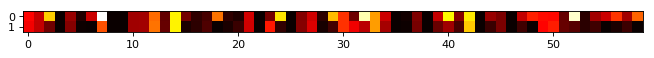

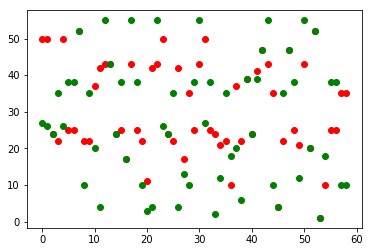

In [15]:
Xhat_G0_G1_Trimmed = XhatG0_shared - XhatG1_Trimmed_shared_proj 
diff_G0_G1_Trimmed = np.linalg.norm(Xhat_G0_G1_Trimmed, axis=1)
#diff_G0_G1_Trimmed
a = np.array(diff_G0_G1)
b = np.array(diff_G0_G1_Trimmed)
m = np.vstack((a,b))
#m1 = np.asmatrix(m)
plt.figure(figsize=(10, 10), dpi=80)
plt.imshow(m, cmap='hot', interpolation='nearest')
plt.show()
#black means small number


# In[46]:


rank_trim = []
rank_noise = []

idx = 1 

for idx in range(XhatG0_shared.shape[0]):
    distance_to_noisy = XhatG1_shared_proj - XhatG0_shared[idx,]
    diff_G1_G0v = np.linalg.norm(distance_to_noisy, axis=1)
    distance_to_trim = XhatG1_Trimmed_shared_proj - XhatG0_shared[idx,]
    diff_G1_Trimmed_G0v = np.linalg.norm(distance_to_trim, axis=1)
    rank_trim.append(diff_G1_Trimmed_G0v.argsort()[0]) 
    rank_noise.append(diff_G1_G0v.argsort()[0])


delta_rank = np.array(rank_noise) - np.array(rank_trim)


# In[47]:


plt.plot(np.array(rank_noise), 'ro')
plt.plot(np.array(rank_trim), 'go')


# In[292]:

In [26]:
delta_rank_sign = delta_rank
delta_rank_sign[delta_rank_sign < 0] = 0
delta_rank_sign[delta_rank_sign > 0] = 1
#binom.test(sum(delta_rank_sign), length(delta_rank_sign))
#=0.01 

In [27]:
delta_rank_sign 

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [28]:
binom_test(sum(delta_rank_sign), len(delta_rank_sign), p=0.5, alternative='greater')

0.9662776940496055